In [1]:
import pandas as pd

In [2]:
large = True

In [8]:
results = pd.read_csv('./results_large.csv' if large else './results.csv', names=['name', 'repo', 'acc', '#w', 'samples', 'time', 'model', 'model_address', 'split'])
results.tail(1)

,name,repo,acc,#w,samples,time,model,model_address,split
50,normal,/data/all/data/foam-framework/foam,0.3,13,33,12-04-2022_16-04-38,t5-large,/scratch/arminz//tmp/ft1_540_foam_0_1/best/,NaN


In [9]:
results['type'] = results['model_address'].apply(lambda s: 'finetuned' if 'finetuned' in s else 'included' if 'included' in s else 'ft' if 'ft' in s else 'excluded')

In [10]:
results.tail(3)

,name,repo,acc,#w,samples,time,model,model_address,split,type
48,normal,/data/all/data/LivelyKernel/LivelyKernel,0.56,12,36,12-04-2022_15-48-06,t5-large,/scratch/arminz//tmp/ft1_807_LivelyKernel_0_1/...,NaN,ft
49,normal,/data/all/data/svgdotjs/svg.js,0.10,5,31,12-04-2022_15-55-32,t5-large,/scratch/arminz//tmp/ft1_75_svg.js_0_1/best/,NaN,ft
50,normal,/data/all/data/foam-framework/foam,0.30,13,33,12-04-2022_16-04-38,t5-large,/scratch/arminz//tmp/ft1_540_foam_0_1/best/,NaN,ft


In [11]:
if not large:
    good_5 = results[results['name'].isna() & (results['split'] == 0.5) & (results['type'] == 'good') & (results['repo'] != 'all')]
    good_2 = results[results['name'].isna() & (results['split'] == 0.2) & (results['type'] == 'good') & (results['repo'] != 'all')]
    inc_2 = results[results['name'].isna() & (results['split'] == 0.2) & (results['type'] == 'included') & (results['repo'] != 'all')]
    inc_5 = results[results['name'].isna() & (results['split'] == 0.5) & (results['type'] == 'included') & (results['repo'] != 'all')]
    exc_5 = results[results['name'].isna() & (results['split'] == 0.5) & (results['type'] == 'excluded') & (results['repo'] != 'all')]
    exc_2 = results[results['name'].isna() & (results['split'] == 0.2) & (results['type'] == 'excluded') & (results['repo'] != 'all')]
    ft_2 = results[(results['name'] == 'normal') & (results['type'] == 'ft') & (results['repo'] != 'all')]
else:
    good_2 = results[(results['name'] == 'normal') & (results['type'] == 'finetuned') & (results['repo'] != 'all')]
    inc_2 = results[(results['name'] == 'normal') & (results['type'] == 'included') & (results['repo'] != 'all')]
    exc_2 = results[(results['name'] == 'normal') & (results['type'] == 'excluded') & (results['repo'] != 'all')]
    ft_2 = results[(results['name'] == 'normal') & (results['type'] == 'ft') & (results['repo'] != 'all')]

adapter = results[(results['name'] == 'withAdapter')]

In [14]:
if not large:
    print(len(good_5), len(good_2), len(inc_2), len(inc_5), len(exc_2), len(exc_5), len(adapter), len(ft_2))
else:
    print(len(good_2), len(inc_2), len(exc_2), len(adapter), len(ft_2))

8 10 11 10 10


In [15]:
inc_2['acc'].mean(), (inc_2['acc'] * inc_2['samples']).sum() / inc_2['samples'].sum(), inc_2['acc'].median()

(0.651, 0.6376382978723404, 0.615)

In [16]:
# inc_5['acc'].mean(), (inc_5['acc'] * inc_5['samples']).sum() / inc_5['samples'].sum()

In [17]:
exc_2['acc'].mean(), (exc_2['acc'] * exc_2['samples']).sum() / exc_2['samples'].sum(), exc_2['acc'].median()

(0.4854545454545454, 0.4873161033797217, 0.45)

In [18]:
# exc_5['acc'].mean(), (exc_5['acc'] * exc_5['samples']).sum() / exc_5['samples'].sum()

In [19]:
good_2['acc'].mean(), (good_2['acc'] * good_2['samples']).sum() / good_2['samples'].sum(), good_2['acc'].median()

(0.70375, 0.6962111801242237, 0.66)

In [20]:
# good_5['acc'].mean(), (good_5['acc'] * good_5['samples']).sum() / good_5['samples'].sum()

In [21]:
adapter['acc'].mean(), (adapter['acc'] * adapter['samples']).sum() / adapter['samples'].sum(), adapter['acc'].median()

(0.6679999999999999, 0.6538085106382978, 0.6)

In [22]:
ft_2['acc'].mean(), (ft_2['acc'] * ft_2['samples']).sum() / ft_2['samples'].sum(), ft_2['acc'].median()

(0.404, 0.4277659574468085, 0.43)

In [44]:
inc_2

,name,repo,acc,#w,samples,time,model,model_address,split,type
50,NaN,/data/all/data/qooxdoo/qooxdoo,0.53,18,115,25-01-2022_09-42-10,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
51,NaN,/data/all/data/elastic/kibana,0.45,17,51,25-01-2022_09-43-03,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
52,NaN,/data/all/data/emberjs/ember.js,0.53,11,47,25-01-2022_09-43-44,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
53,NaN,/data/all/data/zloirock/core-js,0.24,8,41,25-01-2022_09-44-17,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
54,NaN,/data/all/data/Encapsule-Annex/onm,1.00,1,39,25-01-2022_09-44-43,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
55,NaN,/data/all/data/sequelize/sequelize,0.35,12,40,25-01-2022_09-45-06,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
56,NaN,/data/all/data/dcos/dcos-ui,0.92,9,37,25-01-2022_09-45-43,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
57,NaN,/data/all/data/LivelyKernel/LivelyKernel,0.61,12,36,25-01-2022_09-46-15,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
58,NaN,/data/all/data/svgdotjs/svg.js,0.13,5,31,25-01-2022_09-46-51,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
59,NaN,/data/all/data/foam-framework/foam,0.33,13,33,25-01-2022_09-47-17,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included


In [45]:
exc_2

,name,repo,acc,#w,samples,time,model,model_address,split,type
20,NaN,/data/all/data/qooxdoo/qooxdoo,0.48,18,115,24-01-2022_16-16-11,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
21,NaN,/data/all/data/elastic/kibana,0.43,17,51,24-01-2022_16-17-24,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
22,NaN,/data/all/data/emberjs/ember.js,0.51,11,47,24-01-2022_16-18-12,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
23,NaN,/data/all/data/zloirock/core-js,0.20,8,41,24-01-2022_16-19-13,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
24,NaN,/data/all/data/Encapsule-Annex/onm,1.00,1,39,24-01-2022_16-19-55,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
25,NaN,/data/all/data/sequelize/sequelize,0.38,12,40,24-01-2022_16-20-31,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
26,NaN,/data/all/data/dcos/dcos-ui,0.92,9,37,24-01-2022_16-21-14,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
27,NaN,/data/all/data/LivelyKernel/LivelyKernel,0.61,12,36,24-01-2022_16-21-52,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
28,NaN,/data/all/data/svgdotjs/svg.js,0.10,5,31,24-01-2022_16-22-35,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded
29,NaN,/data/all/data/foam-framework/foam,0.30,13,33,24-01-2022_16-23-19,t5-small,t5-small_repo-based_21-01-2022_10-29-42/checkp...,0.2,excluded


In [46]:
good_2

,name,repo,acc,#w,samples,time,model,model_address,split,type


In [47]:
adapter

,name,repo,acc,#w,samples,time,model,model_address,split,type
64,withAdapter,/data/all/data/qooxdoo/qooxdoo,0.57,18,115,25-01-2022_18-37-47,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
65,withAdapter,/data/all/data/elastic/kibana,0.47,17,51,25-01-2022_18-41-01,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
66,withAdapter,/data/all/data/emberjs/ember.js,0.57,11,47,25-01-2022_19-40-30,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
67,withAdapter,/data/all/data/zloirock/core-js,0.49,8,41,25-01-2022_20-09-49,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
68,withAdapter,/data/all/data/Encapsule-Annex/onm,1.00,1,39,25-01-2022_18-50-58,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
69,withAdapter,/data/all/data/sequelize/sequelize,0.35,12,40,25-01-2022_18-53-57,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
70,withAdapter,/data/all/data/dcos/dcos-ui,0.86,9,37,25-01-2022_18-57-25,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
71,withAdapter,/data/all/data/LivelyKernel/LivelyKernel,0.67,12,36,25-01-2022_19-00-44,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
72,withAdapter,/data/all/data/svgdotjs/svg.js,0.74,5,31,25-01-2022_22-10-19,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded
73,withAdapter,/data/all/data/foam-framework/foam,0.36,13,33,25-01-2022_19-07-00,t5-small,/scratch/arminz//tmp/adapted,NaN,excluded


In [48]:
results[(results['repo'] == 'all') & (results['split'] == 0.2)]

,name,repo,acc,#w,samples,time,model,model_address,split,type
60,NaN,all,0.40,48,3374,25-01-2022_10-31-49,t5-small,/scratch/arminz/training/t5-small_repo-based-i...,0.2,included
61,NaN,all,0.38,48,3374,25-01-2022_10-35-54,t5-small,/scratch/arminz/training//t5-small_repo-based_...,0.2,excluded


In [49]:
((0.02 * 3374) - (470 * 0.022)) / (3374 - 470)

0.019676308539944905

In [50]:
from matplotlib import pyplot as plt

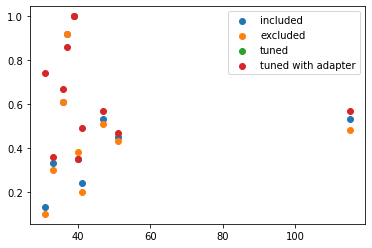

In [51]:
plt.scatter(inc_2['samples'], inc_2['acc'], label='included')
plt.scatter(exc_2['samples'], exc_2['acc'], label='excluded')
plt.scatter(good_2['samples'], good_2['acc'], label='tuned')
plt.scatter(adapter['samples'], adapter['acc'], label='tuned with adapter')
plt.legend()

In [52]:
diff_inc = inc_2.set_index('repo').join(inc_2.set_index('repo')['acc'] - exc_2.set_index('repo')['acc'], rsuffix='ـdiff')

In [53]:
diff_good = good_2.set_index('repo').join(good_2.set_index('repo')['acc'] - exc_2.set_index('repo')['acc'], rsuffix='ـdiff')

In [54]:
diff_adapter = adapter.set_index('repo').join(adapter.set_index('repo')['acc'] - exc_2.set_index('repo')['acc'], rsuffix='ـdiff')

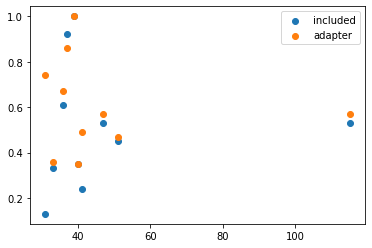

In [55]:
plt.scatter(diff_inc['samples'], diff_inc['acc'], label='included')
plt.scatter(diff_adapter['samples'], diff_adapter['acc'], label='adapter')
plt.legend()

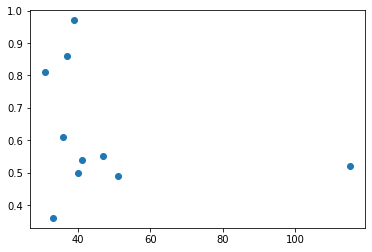

In [105]:
plt.scatter(diff_good['samples'], diff_good['acc'], label='good')


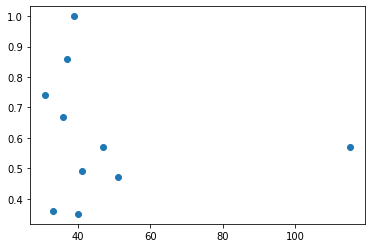

In [106]:
plt.scatter(diff_adapter['samples'], diff_adapter['acc'], label='adapter')
